In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0],dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

In [13]:
X = load_data()
print(f"first 5 elements of X are:\n",X[:5])
print(f'The shape of X is: {X.shape}')

first 5 elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [8]:
# select an initial set of centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

print(f"Shape of idx is: {idx.shape}")
print(f"First 5 elements in idx are: {idx[:5]}")

Shape of idx is: (300,)
First 5 elements in idx are: [0 2 1 0 0]


In [20]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape

    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [21]:
K = 3
centroids = compute_centroids(X, idx, K)
print(f"the centroids are: {centroids}")

the centroids are: [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [22]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    for i in range(max_iters):
        # output progress
        print(f"K-means iteration {i, max_iters-1}")

        # for each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

K-means iteration (0, 9)
K-means iteration (1, 9)
K-means iteration (2, 9)
K-means iteration (3, 9)
K-means iteration (4, 9)
K-means iteration (5, 9)
K-means iteration (6, 9)
K-means iteration (7, 9)
K-means iteration (8, 9)
K-means iteration (9, 9)


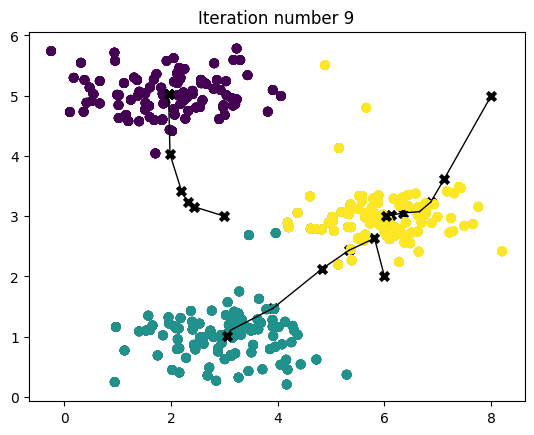

In [23]:
X = load_data()

initial_centroids = np.array([[3,3],[6,2],[8,5]])
K=3

max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

### Random Centroids Initialization

In [24]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    randidx = np.random.permutation(X.shape[0])

    centroids = X[randidx[:K]]

    return centroids

### Compressing Image

In [25]:
original_img = plt.imread("./images/bird_small.png")
print(original_img)

[[[0.85882354 0.7058824  0.40392157]
  [0.9019608  0.7254902  0.45490196]
  [0.8862745  0.7294118  0.43137255]
  ...
  [0.05490196 0.05882353 0.05098039]
  [0.05098039 0.05882353 0.04705882]
  [0.04705882 0.05490196 0.04705882]]

 [[0.9019608  0.75686276 0.46666667]
  [0.8784314  0.7529412  0.47058824]
  [0.8862745  0.7529412  0.4862745 ]
  ...
  [0.0627451  0.0627451  0.05098039]
  [0.05490196 0.05882353 0.03921569]
  [0.04313726 0.05490196 0.03529412]]

 [[0.89411765 0.7490196  0.48235294]
  [0.89411765 0.7490196  0.4745098 ]
  [0.8627451  0.7254902  0.4627451 ]
  ...
  [0.05490196 0.0627451  0.05098039]
  [0.05098039 0.05098039 0.04313726]
  [0.04313726 0.05882353 0.03921569]]

 ...

 [[0.05882353 0.07058824 0.0627451 ]
  [0.07058824 0.08235294 0.07058824]
  [0.07058824 0.07450981 0.0627451 ]
  ...
  [0.31764707 0.1764706  0.1764706 ]
  [0.27450982 0.16862746 0.13725491]
  [0.28235295 0.2        0.16862746]]

 [[0.0627451  0.06666667 0.06666667]
  [0.06666667 0.07058824 0.07450981]


shape of the original image: (128, 128, 3)


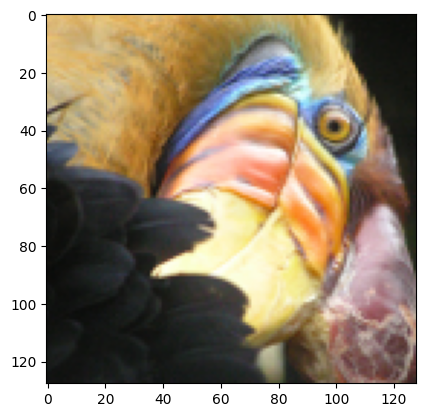

In [27]:
plt.imshow(original_img)
print(f"shape of the original image: {original_img.shape}")

As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [28]:
# divide by 255 so all values are in range 0-1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [30]:
K =  16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-means iteration (0, 9)
K-means iteration (1, 9)
K-means iteration (2, 9)
K-means iteration (3, 9)
K-means iteration (4, 9)
K-means iteration (5, 9)
K-means iteration (6, 9)
K-means iteration (7, 9)
K-means iteration (8, 9)
K-means iteration (9, 9)


In [31]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [11 11 11 11 11]


After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [33]:
X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape)

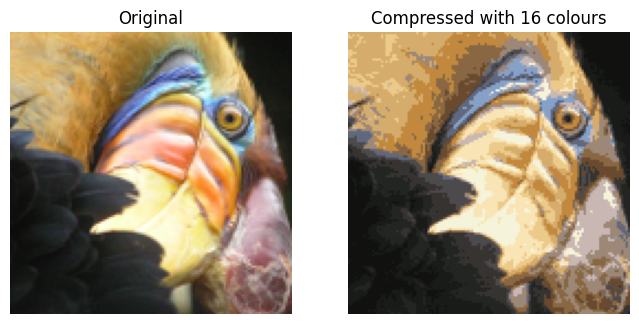

In [34]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()